# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print(weather_api_key)

dc0d70b879e0f386f28168386e95eb93


## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
#lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
#lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

#Sample Set
lats = np.random.uniform(lat_range[0], lat_range[1], size=100)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=100)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
print(cities)
# Print the city count to confirm sufficient count
#len(cities)

['jamestown', 'albany', 'avarua', 'abu dhabi', 'cherskiy', 'vostok', 'georgetown', 'warqla', 'bethel', 'mayumba', 'sorland', 'port elizabeth', 'mataura', 'ribeira grande', 'tuktoyaktuk', 'mount gambier', 'guerrero negro', 'qaanaaq', 'torbay', 'sobolevo', 'taolanaro', 'kieta', 'bengkulu', 'thompson', 'nortelandia', 'dohar', 'labuhan', 'saint-philippe', 'hobart', 'mount isa', 'bluff', 'progreso', 'punta arenas', 'chokurdakh', 'illoqqortoormiut', 'bambous virieux', 'khash', 'fortuna', 'attawapiskat', 'juba', 'atuona', 'sorvag', 'pauini', 'skibbereen', 'vaini', 'saldanha', 'rikitea', 'barentsburg', 'mitsamiouli', 'arraial do cabo', 'takoradi', 'mys shmidta', 'kosa', 'vanimo', 'vila velha', 'port lincoln', 'fano', 'ushuaia', 'narsaq', 'kapaa', 'castro', 'sisimiut', 'muli', 'cape town', 'katsuura', 'samusu', 'takahagi', 'san patricio', 'havoysund', 'airai', 'port augusta', 'kavaratti', 'karratha', 'banepa', 'buriti dos lopes', 'sindor', 'east london', 'butaritari', 'busselton', 'richards bay

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Create a base url
base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key
#print(base_url)

# Create the lists to hold relative data
found_cities =[]
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Create a query url for each city in the cities list to get json response

print("Processing API calls from Open Weather")
for city in cities:
    
    time.sleep(1)
         
    # Create API url for each city
    query_url = base_url +"&q=" + city
    
    # Get json respose for each city
    response = requests.get(query_url).json()

   # Add the values to the lists
    try:       
        found_cities.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])

        print(f"{city} was found in weather data") 
        
    except KeyError:
        print(f"{city} not found. Skipped")
        pass
        
print("End of City list")



Processing API calls from Open Weather
jamestown was found in weather data
albany was found in weather data
avarua was found in weather data
abu dhabi was found in weather data
cherskiy was found in weather data
vostok was found in weather data
georgetown was found in weather data
warqla not found. Skipping...
bethel was found in weather data
mayumba was found in weather data
sorland was found in weather data
port elizabeth was found in weather data
mataura was found in weather data
ribeira grande was found in weather data
tuktoyaktuk was found in weather data
mount gambier was found in weather data
guerrero negro was found in weather data
qaanaaq was found in weather data
torbay was found in weather data
sobolevo was found in weather data
taolanaro not found. Skipping...
kieta was found in weather data
bengkulu was found in weather data
thompson was found in weather data
nortelandia was found in weather data
dohar was found in weather data
labuhan was found in weather data
saint-phili

In [6]:
#Create Dictionary

weather_raw_data = {
    "City": found_cities,
    "Latitude": lat,
    "Lng": lng,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed,
    "Date":date
    }

#Create Data Frame
weather_df = pd.DataFrame.from_dict(weather_raw_data, orient= 'columns')
weather_df

#export to cs
weather_df.to_csv("output_data/cities.csv", index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

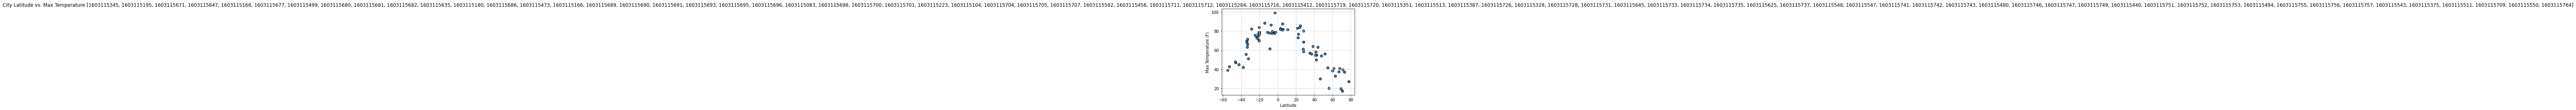

In [16]:
plt.scatter(weather_df["Latitude"],weather_df["Max Temp"],edgecolors="black",facecolors="steelblue")
plt.title(f"City Latitude vs. Max Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig(f"{plt.title}.png")

### Latitude vs. Humidity Plot

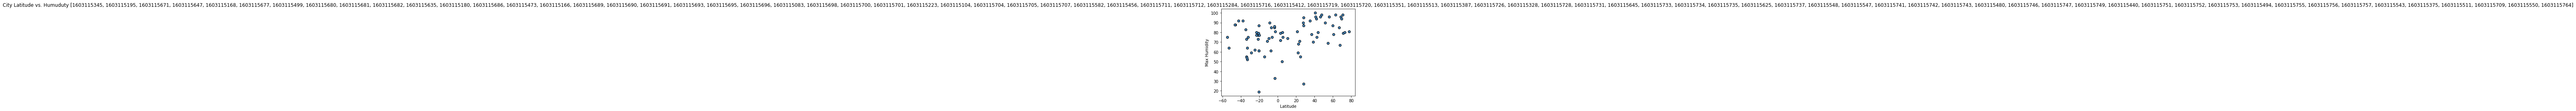

In [17]:
plt.scatter(weather_df["Latitude"],weather_df["Humidity"],edgecolors="black",facecolors="steelblue")
plt.title(f"City Latitude vs. Humuduty {date}")
plt.xlabel("Latitude")
plt.ylabel("Max Humidity")
plt.savefig(f"{plt.title}.png")

### Latitude vs. Cloudiness Plot

### Latitude vs. Wind Speed Plot

## Linear Regression

### Write linear regression plot function (optional)

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression